In [75]:
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds


# Load and split data into 80% train, 10% validation and 10% test
(raw_train, raw_validation, raw_test), metadata = tfds.load('cats_vs_dogs', 
                                                  split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                                  with_info=True,
                                                  as_supervised=True)

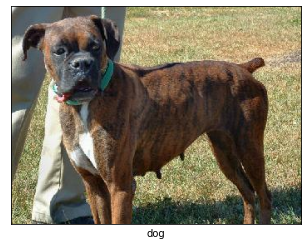

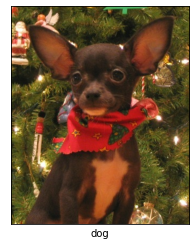

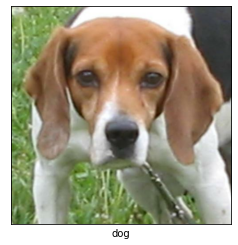

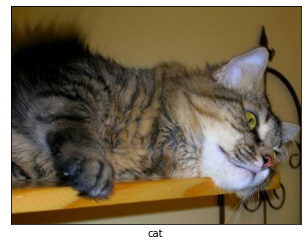

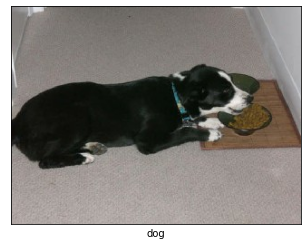

In [72]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels

# Explore images
for image, label in raw_train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.xlabel(get_label_name(label))
    plt.xticks([])
    plt.yticks([])

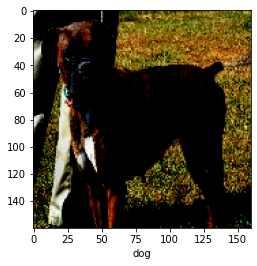

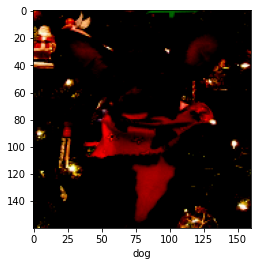

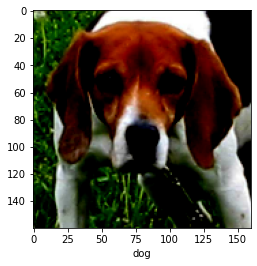

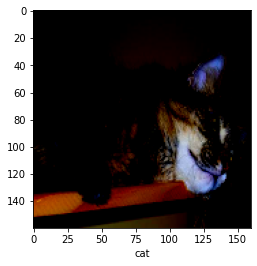

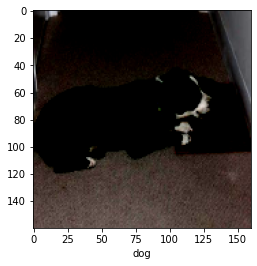

In [96]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

for image, label in train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.xlabel(get_label_name(label))
